In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("pune_home_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1.count()

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

In [7]:

df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:

df1['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [9]:
##Drop features that are not required to build our model

In [10]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis=1)
df2.shape

(13320, 5)

In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
#Data Cleaning: Handle NA values

In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df2[df2.location.isnull()]               ## this is null value in location that we need to drop

,location,size,total_sqft,bath,price
568,NaN,3 BHK,1600,3.0,86.0


In [15]:
df2[df2['size'].isnull()]                   ## this is null value in size that we need to drop

,location,size,total_sqft,bath,price
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
1775,IVC Road,NaN,2000 - 5634,NaN,124.000
2264,Banashankari,NaN,2400,NaN,460.000
2809,Sarjapur Road,NaN,1200 - 2400,NaN,28.785
2862,Devanahalli,NaN,1500 - 2400,NaN,46.800
5333,Devanahalli,NaN,2100 - 5405,NaN,177.115
6423,Whitefield,NaN,2324,NaN,26.730
6636,Jigani,NaN,1500,NaN,25.490
6719,Hoskote,NaN,800 - 2660,NaN,28.545
7680,Kasavanhalli,NaN,5000,NaN,400.000


In [16]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df3.shape

(13246, 5)

In [18]:
#Feature Engineering
##Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [19]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [20]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\BigData\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [22]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [23]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [24]:
##first need to explore the total_sqft value then we will takel bhk column

In [25]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
df3['total_sqft'].value_counts()

1200    843
1100    221
1500    204
2400    195
600     180
       ... 
1642      1
1004      1
3746      1
3770      1
2108      1
Name: total_sqft, Length: 2067, dtype: int64

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [29]:
df3[~df3['total_sqft'].apply(lambda x : False if len(x)>4 else True)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
44,Kanakpura Road,2 BHK,1330.74,2.0,91.790,2
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
142,Kasavanhalli,3 BHK,1563.05,3.0,105.000,3
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
373,Gopalapura,3 BHK,2023.71,3.0,275.000,3
393,Electronics City Phase 1,2 BHK,1113.27,2.0,53.000,2
408,Rajaji Nagar,7 BHK,12000,6.0,2200.000,7


In [30]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [31]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [32]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [33]:
df4.iloc[44]

location      Kanakpura Road
size                   2 BHK
total_sqft           1330.74
bath                       2
price                  91.79
bhk                        2
Name: 44, dtype: object

In [34]:
#Feature Engineering
##Add new feature called price per square feet

In [35]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']       ## convert the price into price per sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [37]:
df5_stats.count()

8

In [38]:
##Examine locations which is a categorical variable. We need to apply dimensionality 
##reduction technique here to reduce number of locations

In [39]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [40]:
loc_remove_space=df5.location.apply(lambda x: x.strip())
loc_remove_space

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [41]:
loc_val = []
for i in loc_remove_space.unique():
    loc_val.append(i)

In [42]:
print(len(loc_val))
print(df5.shape)
#print(loc_val)

1287
(13200, 7)


In [43]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield         533
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     264
Thanisandra        235
                  ... 
Prasanti Nagar       1
Chokkasandra         1
Jakkasandra          1
Sadduguntepalya      1
t.c palya            1
Name: location, Length: 1287, dtype: int64

In [44]:
location_stats1 = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats1

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [45]:
location_stats.values.sum()

13200

In [46]:
len(location_stats)

1287

In [47]:
len(location_stats[location_stats>10])

240

In [48]:
len(location_stats[location_stats<=10])

1047

In [49]:
#Dimensionality Reduction
#Any location having less than 10 data points should be tagged as "other" location. This way number of categories 
#can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [50]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Ganga Nagar              10
1st Block Koramangala    10
Dairy Circle             10
Basapura                 10
Thyagaraja Nagar         10
                         ..
Prasanti Nagar            1
Chokkasandra              1
Jakkasandra               1
Sadduguntepalya           1
t.c palya                 1
Name: location, Length: 1047, dtype: int64

In [51]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [52]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [53]:
df5[df5.location=='other']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [54]:
#Outlier Removal Using Business Logic
##As a data scientist when you have a conversation with your business manager (who has expertise in real estate), 
##he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 
##If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
##We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [55]:
df5[(df5.total_sqft/df5.bhk)<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [56]:
#Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. 
#These are clear data errors that can be removed safely

In [57]:
wrong_bhk = df5[(df5.total_sqft/df5.bhk)<300]
wrong_bhk.shape

(744, 7)

In [58]:
wrong_bhk

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [59]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [60]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [61]:
#Outlier Removal Using Standard Deviation and Mean

In [62]:
df6.price_per_sqft.describe()         ## Here no any home price would be 267 INR per sqft sso we should remove this one

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [63]:
##Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. 
##We should remove outliers per location using mean and one standard deviation

In [64]:
log_group=df6.groupby('location')
log_group.min()

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
1st Block Jayanagar,2 BHK,1000.0,2.0,60.0,2,6000.000000
1st Phase JP Nagar,1 BHK,840.0,2.0,50.0,1,5274.725275
2nd Phase Judicial Layout,1 BHK,525.0,1.0,26.0,1,3500.000000
2nd Stage Nagarbhavi,4 Bedroom,1200.0,3.0,170.0,4,5666.666667
5th Block Hbr Layout,2 BHK,1100.0,2.0,48.0,2,3611.111111
...,...,...,...,...,...,...
Yelahanka,1 BHK,567.0,1.0,14.0,1,371.428571
Yelahanka New Town,1 BHK,350.0,1.0,13.5,1,1875.000000
Yelenahalli,2 BHK,1056.0,2.0,33.0,2,3125.000000


In [65]:
log_group.max()

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
1st Block Jayanagar,4 Bedroom,2850.0,4.0,450.0,4,18750.000000
1st Phase JP Nagar,5 Bedroom,4550.0,7.0,400.0,5,25000.000000
2nd Phase Judicial Layout,3 BHK,1681.0,3.0,69.0,3,5000.000000
2nd Stage Nagarbhavi,6 Bedroom,4000.0,8.0,451.0,6,20416.666667
5th Block Hbr Layout,6 BHK,5100.0,5.0,300.0,6,17083.333333
...,...,...,...,...,...,...
Yelahanka,6 Bedroom,35000.0,6.0,800.0,6,19875.776398
Yelahanka New Town,4 Bedroom,4000.0,3.0,899.0,4,22475.000000
Yelenahalli,3 BHK,1650.0,3.0,68.0,3,5176.876618


In [66]:
df6[df6.location == 'Yelahanka'].sort_values(by=['price_per_sqft'], ascending=False)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3697,Yelahanka,4 Bedroom,4025.0,5.0,800.0,4,19875.776398
3293,Yelahanka,4 Bedroom,4346.0,4.0,450.0,4,10354.348827
5779,Yelahanka,4 Bedroom,1800.0,4.0,180.0,4,10000.000000
1561,Yelahanka,3 Bedroom,2710.0,3.0,251.0,3,9261.992620
10158,Yelahanka,4 BHK,4025.0,6.0,350.0,4,8695.652174
...,...,...,...,...,...,...,...
6328,Yelahanka,1 BHK,651.0,1.0,17.5,1,2688.172043
7272,Yelahanka,1 Bedroom,1075.0,1.0,19.5,1,1813.953488
9374,Yelahanka,1 BHK,1000.0,1.0,14.0,1,1400.000000
7242,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573.921028


In [67]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [68]:
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [69]:
df7.sort_values(by=['price_per_sqft','bhk'], ascending=True).head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8373,other,4 Bedroom,2000.0,3.0,25.0,4,1250.000000
8643,other,1 BHK,1500.0,1.0,19.5,1,1300.000000
8677,other,5 BHK,5800.0,5.0,80.0,5,1379.310345
9669,other,1 Bedroom,10030.0,1.0,150.0,1,1495.513460
9439,other,7 Bedroom,6500.0,7.0,104.0,7,1600.000000


In [70]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.bhk==2) & (df.location==location)]
    bhk3 = df[(df.bhk==3) & (df.location==location)]
    matplotlib.rcParams['figure.figsize'] = (10,8)
    plt.scatter(bhk2.total_sqft,bhk2.price, marker='*', color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

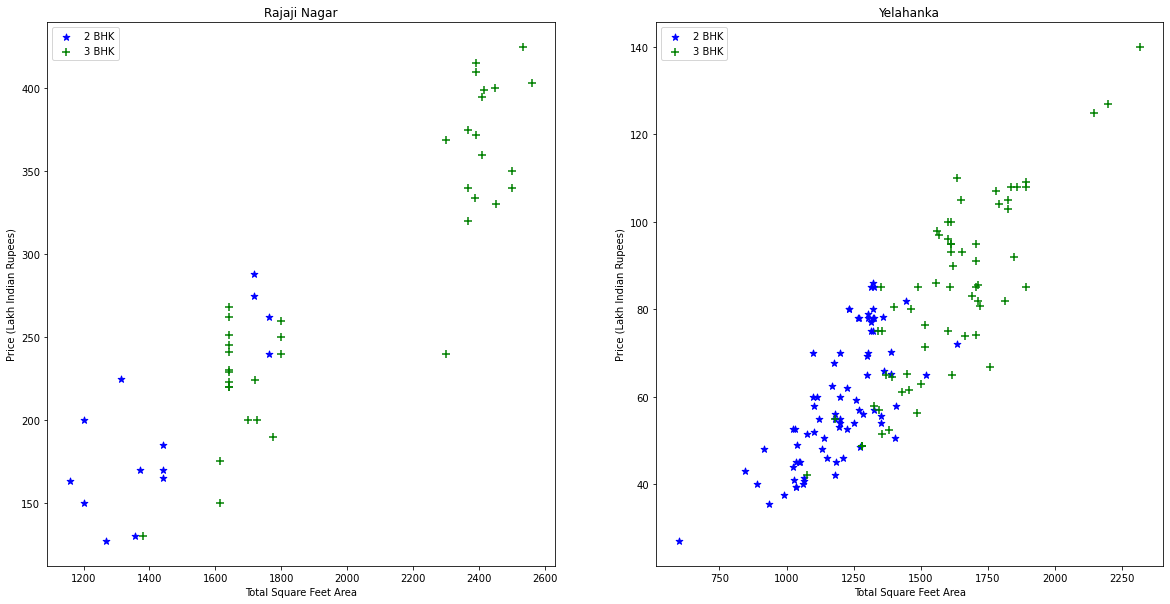

In [71]:
plt.subplot(1, 2, 1)
plot_scatter_chart(df7,"Rajaji Nagar")
plt.subplot(1, 2, 2)
plot_scatter_chart(df7,"Yelahanka")


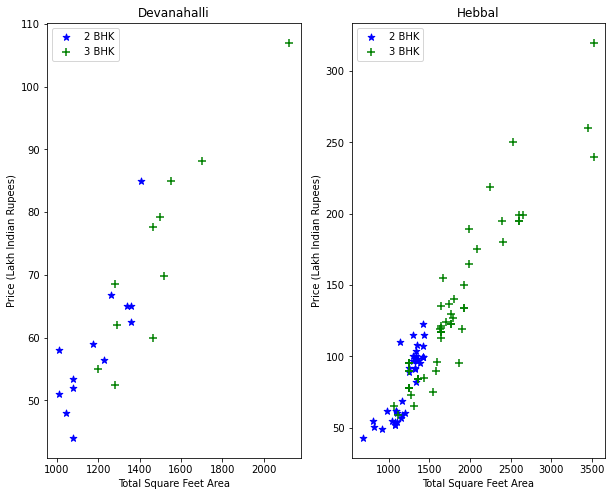

In [72]:
plt.subplot(1, 2, 1)
plot_scatter_chart(df7,"Devanahalli")
plt.subplot(1, 2, 2)
plot_scatter_chart(df7,"Hebbal")

In [73]:
#We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 
#2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary 
#of stats per bhk,
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [74]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [75]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

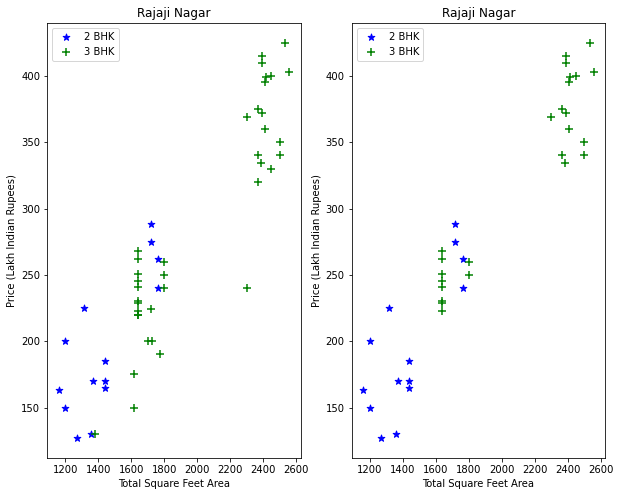

In [76]:
plt.subplot(1, 2, 1)
plot_scatter_chart(df7,"Rajaji Nagar")
plt.subplot(1, 2, 2)
plot_scatter_chart(df8,"Rajaji Nagar")

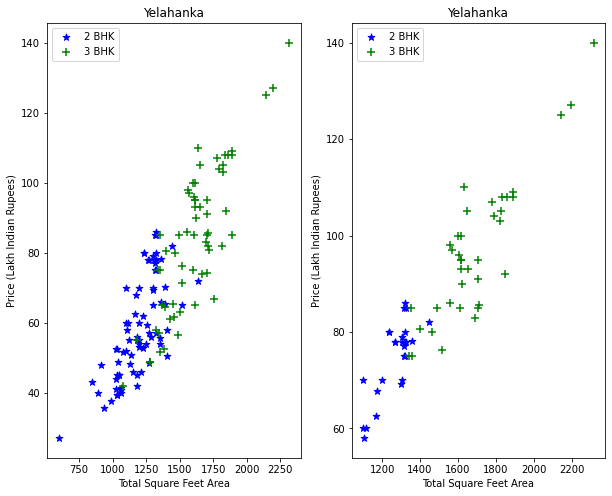

In [77]:
plt.subplot(1, 2, 1)
plot_scatter_chart(df7,"Yelahanka")
plt.subplot(1, 2, 2)
plot_scatter_chart(df8,"Yelahanka")

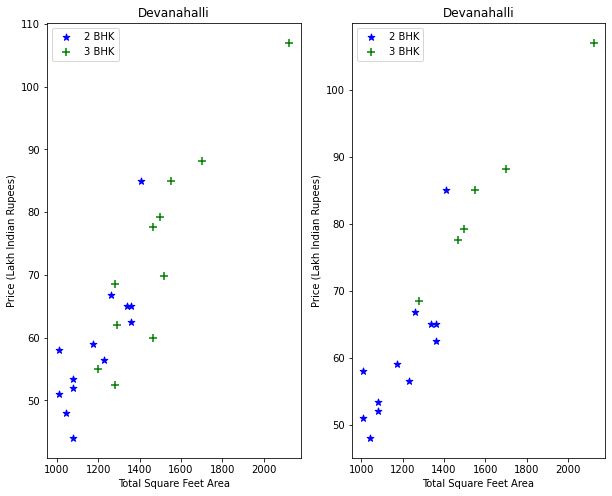

In [78]:
plt.subplot(1, 2, 1)
plot_scatter_chart(df7,"Devanahalli")
plt.subplot(1, 2, 2)
plot_scatter_chart(df8,"Devanahalli")


In [79]:
# Now Check the histogram of price per sqft

Text(0, 0.5, 'Count')

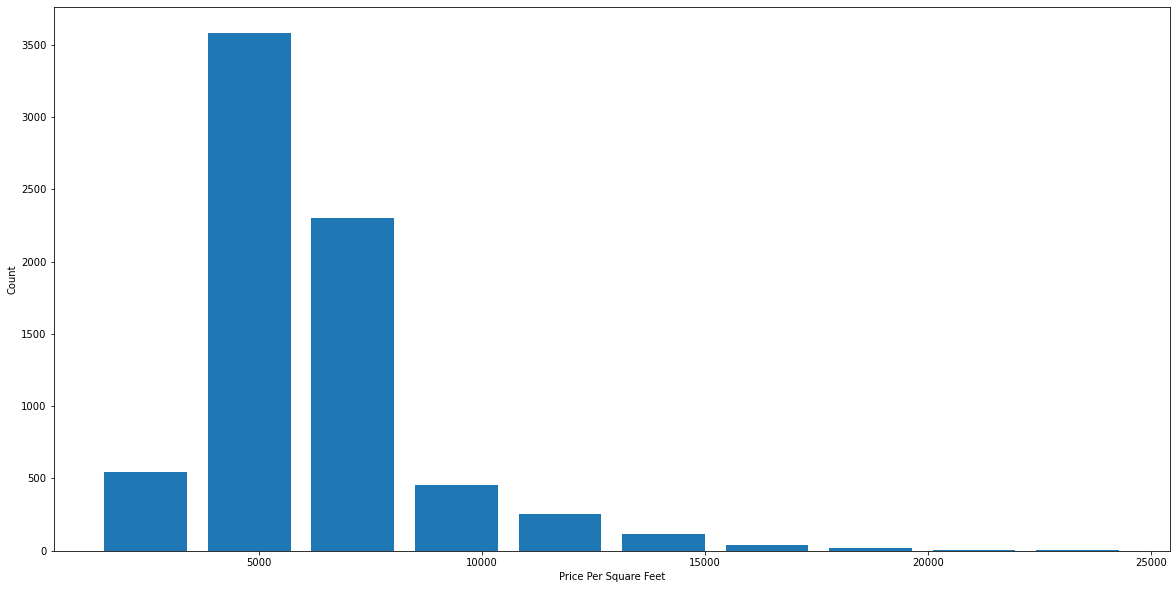

In [80]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [81]:
#Outlier Removal Using Bathrooms Feature

In [82]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

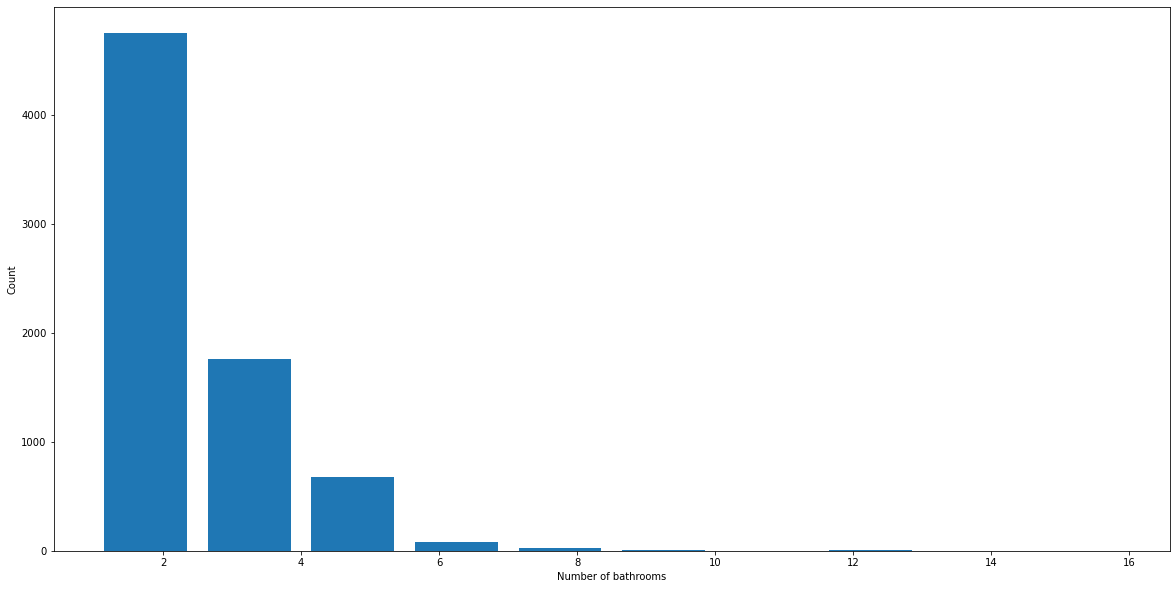

In [83]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [84]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [85]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [86]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home So we need to remove those record which has more than
# 2 bathroom than room(bhk)

In [87]:
df8.shape

(7317, 7)

In [88]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [89]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [90]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [91]:
df10.shape

(7239, 5)

In [92]:
# Use One Hot Encoding For Location column to conver string into number

In [93]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
dummies.shape

(7239, 241)

In [95]:
dummies = dummies.drop('other',axis='columns')
dummies.shape

(7239, 240)

In [96]:
df10['location'].value_counts()

other                    1126
Whitefield                238
Sarjapur  Road            186
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
Vishveshwarya Layout        4
HAL 2nd Stage               4
2nd Stage Nagarbhavi        4
Vishwapriya Layout          4
Marsur                      3
Name: location, Length: 241, dtype: int64

In [97]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.shape

(7239, 245)

In [98]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df12 = df11.drop('location',axis='columns')
df12.shape

(7239, 244)

In [100]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
#Build a Model Now...

In [102]:
df12.shape

(7239, 244)

In [103]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
X.shape

(7239, 243)

In [105]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [107]:
print(len(y))
print(y.shape)

7239
(7239,)


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [109]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229447

In [137]:
lr_clf.predict(X_test)

array([123.68919775,  79.12643295,  76.7573612 , ...,  58.55465139,
        99.4418541 , 135.74127115])

In [110]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502,
       0.7996843 ])

In [115]:
## We can see that in 6 iterations we get a score above 80% all the time. This is pretty good but we want to test few other 
#algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [116]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [117]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726762,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.714560,"{'criterion': 'mse', 'splitter': 'best'}"


In [118]:
#Test the model for few properties

In [119]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [145]:
loc_index = np.where(X.columns=='Indira Nagar')[0][0]
loc_index

116

In [134]:
x = np.zeros(len(X.columns))
x[0] =1000      #sqft
x[1] =3          #bath
x[2] =3         #bhk
if loc_index >= 0:
    x[loc_index] = 1
x    

array([1000.,    3.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [140]:
lr_clf.predict([x])

array([195.5268976])

In [141]:
predict_price('Indira Nagar',1000, 3, 3)

195.52689759854428

In [120]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.86570258311492

In [121]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

86.08062284986266

In [124]:
predict_price('1st Phase JP Nagar',2000, 2, 3)

162.48157934624453

In [125]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [126]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))